# DATA EXPLORATION


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_2015= pd.read_csv("data/2015.csv")
df_2016= pd.read_csv("data/2016.csv")
df_2017= pd.read_csv("data/2017.csv")
df_2018= pd.read_csv("data/2018.csv")
df_2019= pd.read_csv("data/2019.csv")


### COUNT OF NULLS:

In [40]:
df_2015.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [41]:
df_2016.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [42]:
df_2017.isna().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [43]:
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

#### Let´s check which country is the one that has the null value:

In [4]:
null_value_row = df_2018[df_2018['Perceptions of corruption'].isnull()]

null_value_row


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


### The country that has the null value is the United Arab Emirates, we are going to replace the value with 0.182, that is the actual value of perception of corruption (after research).

In [5]:
df_2018.loc[null_value_row.index, 'Perceptions of corruption'] = 0.182

In [6]:
df_2018[(df_2018['Country or region'] == "United Arab Emirates")]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,0.182


In [47]:
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [48]:
df_2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### CHANGE ORDER OF COLUMNS AND DELETING COLUMNS:

### 2015 DATA:

In [108]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Year column:

In [7]:
df_2015['year'] = 2015

#### Delete columns:

In [8]:
deleted_columns = ["Region", "Standard Error", "Family", "Dystopia Residual", "Happiness Rank"]

df_2015 = df_2015.drop(deleted_columns, axis=1)

#### Reorder Columns:

In [9]:
new_order = ['year', 'Country', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Happiness Score']

df_2015 = df_2015[new_order]

df_2015.head()

,year,Country,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Happiness Score
0,2015,Switzerland,1.39651,0.94143,0.66557,0.29678,0.41978,7.587
1,2015,Iceland,1.30232,0.94784,0.62877,0.43630,0.14145,7.561
2,2015,Denmark,1.32548,0.87464,0.64938,0.34139,0.48357,7.527
3,2015,Norway,1.45900,0.88521,0.66973,0.34699,0.36503,7.522
4,2015,Canada,1.32629,0.90563,0.63297,0.45811,0.32957,7.427


#### Change column names:

In [10]:
print(df_2015.columns)

Index(['year', 'Country', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Happiness Score'],
      dtype='object')


In [11]:
df_2015 = df_2015.rename(columns={
    'year': 'year',
    'Country': 'country',
    'Economy (GDP per Capita)': 'gdp_per_capita',
    'Health (Life Expectancy)': 'healthy_life_expectancy',
    'Freedom': 'freedom',
    'Generosity': 'generosity',
    'Trust (Government Corruption)': 'corruption',
    'Happiness Score': 'happiness_score'
})

df_2015.head()

,year,country,gdp_per_capita,healthy_life_expectancy,freedom,generosity,corruption,happiness_score
0,2015,Switzerland,1.39651,0.94143,0.66557,0.29678,0.41978,7.587
1,2015,Iceland,1.30232,0.94784,0.62877,0.43630,0.14145,7.561
2,2015,Denmark,1.32548,0.87464,0.64938,0.34139,0.48357,7.527
3,2015,Norway,1.45900,0.88521,0.66973,0.34699,0.36503,7.522
4,2015,Canada,1.32629,0.90563,0.63297,0.45811,0.32957,7.427


### 2016 DATA:

In [114]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


#### Year column:

In [12]:
df_2016['year'] = 2016

#### Delete columns:

In [13]:
deleted_columns = ["Region", "Lower Confidence Interval", "Upper Confidence Interval", "Family", "Dystopia Residual", "Happiness Rank"]

df_2016 = df_2016.drop(deleted_columns, axis=1)

#### Reorder columns:

In [14]:
new_order = ['year', 'Country', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Happiness Score']

df_2016 = df_2016[new_order]

df_2016.head()

,year,Country,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Happiness Score
0,2016,Denmark,1.44178,0.79504,0.57941,0.36171,0.44453,7.526
1,2016,Switzerland,1.52733,0.86303,0.58557,0.28083,0.41203,7.509
2,2016,Iceland,1.42666,0.86733,0.56624,0.47678,0.14975,7.501
3,2016,Norway,1.57744,0.79579,0.59609,0.37895,0.35776,7.498
4,2016,Finland,1.40598,0.81091,0.57104,0.25492,0.41004,7.413


#### Change column names:

In [15]:
print(df_2016.columns)

Index(['year', 'Country', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Happiness Score'],
      dtype='object')


In [16]:
df_2016 = df_2016.rename(columns={
    'year': 'year',
    'Country': 'country',
    'Economy (GDP per Capita)': 'gdp_per_capita',
    'Health (Life Expectancy)': 'healthy_life_expectancy',
    'Freedom': 'freedom',
    'Generosity': 'generosity',
    'Trust (Government Corruption)': 'corruption',
    'Happiness Score': 'happiness_score'
})

df_2016.head()

,year,country,gdp_per_capita,healthy_life_expectancy,freedom,generosity,corruption,happiness_score
0,2016,Denmark,1.44178,0.79504,0.57941,0.36171,0.44453,7.526
1,2016,Switzerland,1.52733,0.86303,0.58557,0.28083,0.41203,7.509
2,2016,Iceland,1.42666,0.86733,0.56624,0.47678,0.14975,7.501
3,2016,Norway,1.57744,0.79579,0.59609,0.37895,0.35776,7.498
4,2016,Finland,1.40598,0.81091,0.57104,0.25492,0.41004,7.413


#### 2017 DATA:

In [17]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


#### Year column:

In [18]:
df_2017['year'] = 2017

#### Delete Columns:



In [19]:
deleted_columns = ["Whisker.high", "Whisker.low", "Family", "Dystopia.Residual", "Happiness.Rank"]

df_2017 = df_2017.drop(deleted_columns, axis=1)

#### Reorder Columns:

In [20]:
new_order = ['year', 'Country', 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Happiness.Score']

df_2017 = df_2017[new_order]

df_2017.head()

,year,Country,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Happiness.Score
0,2017,Norway,1.616463,0.796667,0.635423,0.362012,0.315964,7.537
1,2017,Denmark,1.482383,0.792566,0.626007,0.355280,0.400770,7.522
2,2017,Iceland,1.480633,0.833552,0.627163,0.475540,0.153527,7.504
3,2017,Switzerland,1.564980,0.858131,0.620071,0.290549,0.367007,7.494
4,2017,Finland,1.443572,0.809158,0.617951,0.245483,0.382612,7.469


#### Change Column names:

In [21]:
print(df_2017.columns)

Index(['year', 'Country', 'Economy..GDP.per.Capita.',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Happiness.Score'],
      dtype='object')


In [22]:
df_2017 = df_2017.rename(columns={
    'year': 'year',
    'Country': 'country',
    'Economy..GDP.per.Capita.': 'gdp_per_capita',
    'Health..Life.Expectancy.': 'healthy_life_expectancy',
    'Freedom': 'freedom',
    'Generosity': 'generosity',
    'Trust..Government.Corruption.': 'corruption',
    'Happiness.Score': 'happiness_score'
})

df_2017.head()

,year,country,gdp_per_capita,healthy_life_expectancy,freedom,generosity,corruption,happiness_score
0,2017,Norway,1.616463,0.796667,0.635423,0.362012,0.315964,7.537
1,2017,Denmark,1.482383,0.792566,0.626007,0.355280,0.400770,7.522
2,2017,Iceland,1.480633,0.833552,0.627163,0.475540,0.153527,7.504
3,2017,Switzerland,1.564980,0.858131,0.620071,0.290549,0.367007,7.494
4,2017,Finland,1.443572,0.809158,0.617951,0.245483,0.382612,7.469


### 2018 DATA:

In [23]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


#### Year Column:

In [24]:
df_2018['year'] = 2018

#### Delete columns:

In [25]:
deleted_columns = ["Overall rank", "Social support"]

df_2018 = df_2018.drop(deleted_columns, axis=1)

#### Reorder Columns:

In [26]:
new_order = ['year', 'Country or region', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Score']

df_2018 = df_2018[new_order]

df_2018.head()

,year,Country or region,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score
0,2018,Finland,1.305,0.874,0.681,0.202,0.393,7.632
1,2018,Norway,1.456,0.861,0.686,0.286,0.340,7.594
2,2018,Denmark,1.351,0.868,0.683,0.284,0.408,7.555
3,2018,Iceland,1.343,0.914,0.677,0.353,0.138,7.495
4,2018,Switzerland,1.420,0.927,0.660,0.256,0.357,7.487


#### Change column names:

In [27]:
print(df_2018.columns)

Index(['year', 'Country or region', 'GDP per capita',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Score'],
      dtype='object')


In [28]:
df_2018 = df_2018.rename(columns={
    'year': 'year',
    'Country or region': 'country',
    'GDP per capita': 'gdp_per_capita',
    'Healthy life expectancy': 'healthy_life_expectancy',
    'Freedom to make life choices': 'freedom',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'corruption',
    'Score': 'happiness_score'
})

df_2018.head()

,year,country,gdp_per_capita,healthy_life_expectancy,freedom,generosity,corruption,happiness_score
0,2018,Finland,1.305,0.874,0.681,0.202,0.393,7.632
1,2018,Norway,1.456,0.861,0.686,0.286,0.340,7.594
2,2018,Denmark,1.351,0.868,0.683,0.284,0.408,7.555
3,2018,Iceland,1.343,0.914,0.677,0.353,0.138,7.495
4,2018,Switzerland,1.420,0.927,0.660,0.256,0.357,7.487


### 2019 DATA:

In [29]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### Year Column: 

In [30]:
df_2019['year'] = 2019

#### Delete Columns:

In [31]:
deleted_columns = ["Overall rank", "Social support"]

df_2019 = df_2019.drop(deleted_columns, axis=1)

#### Reorder Columns:

In [32]:
new_order = ['year', 'Country or region', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Score']

df_2019 = df_2019[new_order]

df_2019.head()

,year,Country or region,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score
0,2019,Finland,1.340,0.986,0.596,0.153,0.393,7.769
1,2019,Denmark,1.383,0.996,0.592,0.252,0.410,7.600
2,2019,Norway,1.488,1.028,0.603,0.271,0.341,7.554
3,2019,Iceland,1.380,1.026,0.591,0.354,0.118,7.494
4,2019,Netherlands,1.396,0.999,0.557,0.322,0.298,7.488


#### Change column names:

In [33]:
print(df_2019.columns)

Index(['year', 'Country or region', 'GDP per capita',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Score'],
      dtype='object')


In [34]:
df_2019 = df_2019.rename(columns={
    'year': 'year',
    'Country or region': 'country',
    'GDP per capita': 'gdp_per_capita',
    'Healthy life expectancy': 'healthy_life_expectancy',
    'Freedom to make life choices': 'freedom',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'corruption',
    'Score': 'happiness_score'
})

df_2019.head()

,year,country,gdp_per_capita,healthy_life_expectancy,freedom,generosity,corruption,happiness_score
0,2019,Finland,1.340,0.986,0.596,0.153,0.393,7.769
1,2019,Denmark,1.383,0.996,0.592,0.252,0.410,7.600
2,2019,Norway,1.488,1.028,0.603,0.271,0.341,7.554
3,2019,Iceland,1.380,1.026,0.591,0.354,0.118,7.494
4,2019,Netherlands,1.396,0.999,0.557,0.322,0.298,7.488


## CONCATENATE ALL THE DATA:

In [35]:
df_final = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

df_final

,year,country,gdp_per_capita,healthy_life_expectancy,freedom,generosity,corruption,happiness_score
0,2015,Switzerland,1.39651,0.94143,0.66557,0.29678,0.41978,7.587
1,2015,Iceland,1.30232,0.94784,0.62877,0.43630,0.14145,7.561
2,2015,Denmark,1.32548,0.87464,0.64938,0.34139,0.48357,7.527
3,2015,Norway,1.45900,0.88521,0.66973,0.34699,0.36503,7.522
4,2015,Canada,1.32629,0.90563,0.63297,0.45811,0.32957,7.427
...,...,...,...,...,...,...,...,...
777,2019,Rwanda,0.35900,0.61400,0.55500,0.21700,0.41100,3.334
778,2019,Tanzania,0.47600,0.49900,0.41700,0.27600,0.14700,3.231
779,2019,Afghanistan,0.35000,0.36100,0.00000,0.15800,0.02500,3.203
780,2019,Central African Republic,0.02600,0.10500,0.22500,0.23500,0.03500,3.083


In [37]:
df_final.isna().sum()

id                         0
year                       0
country                    0
gdp_per_capita             0
healthy_life_expectancy    0
freedom                    0
generosity                 0
corruption                 0
happiness_score            0
dtype: int64

# EVALUATE CORRELATIONS:

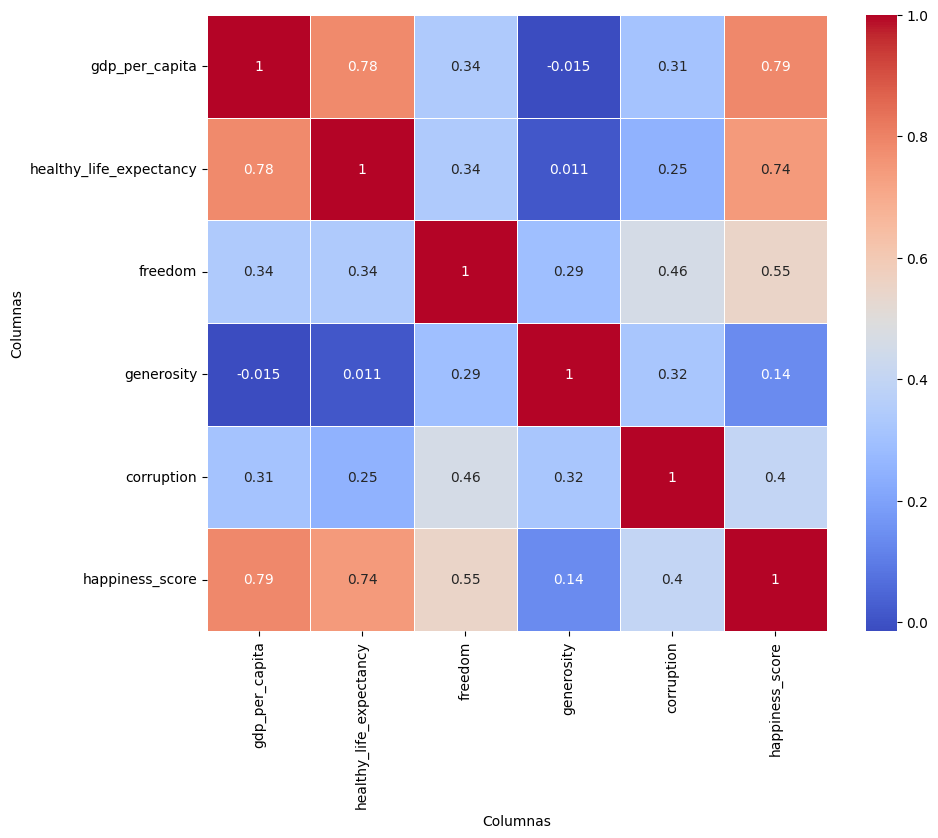

In [38]:
columns_evaluated = df_final.iloc[:, 3:] 

cor_matrix = columns_evaluated.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.xlabel("Columnas")
plt.ylabel("Columnas")


plt.show()



#### We can see that there is little correlation between the hapiness score that is the dependent variable and the generosity. But as trying to train the model, we can conclude that deleting this value from the possible feautures wouldn't have an impact in the metrics. 

# TRAINING MY MODEL

#### A multiple linear regression model was implemented, with the following features: gdp per capita, life expectancy and health, freedom of choice, generosity, and perception of government corruption.


In [39]:
features = ["gdp_per_capita", "healthy_life_expectancy", "freedom", "generosity", "corruption"]
target = "happiness_score"
X = df_final[features]
y = df_final[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.3374889161790042
R-squared (R2) Score: 0.7324038207940642


### Export my model:

In [40]:
model_saved = "./model/trained_model.pkl"

# Guarda el modelo en el archivo .pkl
joblib.dump(model, model_saved)

['trained_model.pkl']